<a href="https://colab.research.google.com/github/YusupBudiman/Chatbot-V2/blob/main/Chatbot_ObatUmum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

<h2> Importing the Data </h2>

The data is stored in a json file, which can be imported and used as a pandas dataframe.
This data was manually created by me. hence, it's not that big.<br>
we all know that deep learning requires large chunks of data. but, That is not the case here. I have utilized a neural network architecture powerful enough to handle this small amount of data

In [ ]:
#importing the dataset
with open('/content/drive/MyDrive/Orbit academy/PA_Orbit/Asset/intents.json') as content:
  data1 = json.load(content)

In [ ]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,halo,greeting
2,hi,greeting
3,hai,greeting
4,hey,greeting
...,...,...
940,bagaimana kerja aplikasi,hal3
941,tolong,hal3
942,bantuan,hal3
943,cara kerja,hal3


In [ ]:
data = data.sample(frac=1)

<h2> Pre-Processing </h2>

Important pre-processing such as removing the punctuations, converting to lowercase, encoding the textual data to numerical data are done

In [ ]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
121,deskripsi bodrexin flu dan batuk berdahak pe s...,obat34
88,obat biolysin kids rasa orange 30 tablet,obat23
917,17,lis17
558,obat termorex 60 ml,obat176
43,deskripsi antimo 50 mg 10 tablet,obat9
...,...,...
726,obat asam urat,ask43
142,zevit c 4 kapsul,obat40
846,vitamin anak,ask77
547,deskripsi stop cold,obat173


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  603
output length:  296


<h2>Neural Network</h2>

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. the outputs of the embedding layer is the input of the reccurent layer with lstm gate. then, the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives has a corresponding vector for each word in the dataset

In [ ]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
30/30 [==============================] - 3s 7ms/step - loss: 5.6919 - accuracy: 0.0042
Epoch 2/200
30/30 [==============================] - 0s 7ms/step - loss: 5.6846 - accuracy: 0.0180
Epoch 3/200
30/30 [==============================] - 0s 7ms/step - loss: 5.6730 - accuracy: 0.0212
Epoch 4/200
30/30 [==============================] - 0s 8ms/step - loss: 5.6431 - accuracy: 0.0180
Epoch 5/200
30/30 [==============================] - 0s 8ms/step - loss: 5.5684 - accuracy: 0.0254
Epoch 6/200
30/30 [==============================] - 0s 8ms/step - loss: 5.4478 - accuracy: 0.0296
Epoch 7/200
30/30 [==============================] - 0s 8ms/step - loss: 5.2981 - accuracy: 0.0423
Epoch 8/200
30/30 [==============================] - 0s 8ms/step - loss: 5.1139 - accuracy: 0.0593
Epoch 9/200
30/30 [==============================] - 0s 8ms/step - loss: 4.9113 - accuracy: 0.0825
Epoch 10/200
30/30 [==============================] - 0s 7ms/step - loss: 4.7334 - accuracy: 0.0815
Epoch 11/

<h2> Model Analysis </h2>

The model got a perfect accuracy of 100%. 

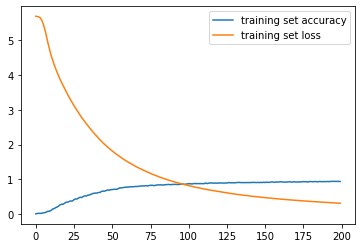

In [ ]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

<h2> Testing </h2>

I have also tested the model in a way to mimic a human interacting with a bot and got positive results. however, This was very simple because of the tiny amount of data that I have created. but, the same model can also be used with large amount of data

In [ ]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  print("------------------------------------------------------")
  if response_tag == "goodbye":
    break

You : hi
1/1 [==============================] - 0s 36ms/step
Going Merry :  hai juga
------------------------------------------------------
You : obat sakit perut
1/1 [==============================] - 0s 20ms/step
Going Merry :  Teh Rosella Dieng Super Kuntum 
------------------------------------------------------
You : Teh Rosella Dieng Super Kuntum
1/1 [==============================] - 0s 20ms/step
Going Merry :  Teh Rosella Dieng Super Kuntum

Harga :
Rp11.800 - Rp22.000

Kategori :
Makanan & Minuman

Indikasi Umum :
Meningkatkan stamina tubuh,mencegah terjadinya stroke dan penyakit jantung,memperkuat pembuluh darah,dapat mengatasi sariawan,menjaga dan meningkatkan daya tahan tubuh,membantu mengobati hipertensi,membantu mengobati asam urat,mengatasi gangguan pernafasan,menghilangkan efek negatif rokok,menetralkan racun,dapat membantu melangsingkan tubuh

Dosis :
Untuk pencegahan 1 - 2 gelas 1 hari
Untuk pengobatan 2 - 3 gelas 1 hari

Aturan Pakai :
Ambil 2 - 3 kuntum / 1 sachet te

In [ ]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from_future_import absolute

SyntaxError: ignored

<h2> Conclusion </h2>
So, This is the Chatbot that I have created with tensorflow2 utilizing the power of embedding matrix.<br>
This was created in memory og <b> Going Merry </b> , a ship from a manga called "One Piece" which revolves around the story of 5 pirates. 